## Setup

In [1]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import math

In [2]:
# Import data
tor_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_train_set.csv")


# Quick inspection
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 35 columns):
DAMAGE_PROPERTY       11959 non-null float64
DURATION_SECONDS      11959 non-null float64
BEGIN_LAT             11959 non-null float64
BEGIN_LON             11959 non-null float64
TOR_LENGTH            11959 non-null float64
TOR_WIDTH             11959 non-null float64
YEAR                  11959 non-null float64
MULTI_VORT_IND        11959 non-null int64
OPEN_WATER_PROP       11959 non-null float64
DEV_OPEN_PROP         11959 non-null float64
DEV_LOW_PROP          11959 non-null float64
DEV_MED_PROP          11959 non-null float64
DEV_HIGH_PROP         11959 non-null float64
BARREN_LAND_PROP      11959 non-null float64
DECID_FOREST_PROP     11959 non-null float64
EVERGR_FOREST_PROP    11959 non-null float64
MIXED_FOREST_PROP     11959 non-null float64
SHRUB_SCRUB_PROP      11959 non-null float64
GRASS_LAND_PROP       11959 non-null float64
PASTURE_HAY_PROP      11959 non-null f

In [3]:
# Seperating variables
# The dependent variables
tornado_outcomes = tor_df.iloc[:, [0]]


# Quick inspection
tornado_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 1 columns):
DAMAGE_PROPERTY    11959 non-null float64
dtypes: float64(1)
memory usage: 93.5 KB


In [4]:
# The independent variables
tornado_features = tor_df.iloc[:, 1:]


# Quick inspection
tornado_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 34 columns):
DURATION_SECONDS      11959 non-null float64
BEGIN_LAT             11959 non-null float64
BEGIN_LON             11959 non-null float64
TOR_LENGTH            11959 non-null float64
TOR_WIDTH             11959 non-null float64
YEAR                  11959 non-null float64
MULTI_VORT_IND        11959 non-null int64
OPEN_WATER_PROP       11959 non-null float64
DEV_OPEN_PROP         11959 non-null float64
DEV_LOW_PROP          11959 non-null float64
DEV_MED_PROP          11959 non-null float64
DEV_HIGH_PROP         11959 non-null float64
BARREN_LAND_PROP      11959 non-null float64
DECID_FOREST_PROP     11959 non-null float64
EVERGR_FOREST_PROP    11959 non-null float64
MIXED_FOREST_PROP     11959 non-null float64
SHRUB_SCRUB_PROP      11959 non-null float64
GRASS_LAND_PROP       11959 non-null float64
PASTURE_HAY_PROP      11959 non-null float64
CULT_CROPS_PROP       11959 non-null f

In [5]:
# Make the dependent variables into a numpy array
outcomes_array = tornado_outcomes.values


# Makes the numpy array into a torch Tensor
outcomes_Tensor = torch.from_numpy(outcomes_array)


# Quick inspection
outcomes_Tensor


 0.1532
 0.6540
 0.0873
   ⋮    
-1.4219
 0.1532
 0.2814
[torch.DoubleTensor of size 11959x1]

In [6]:
# Make the independent variables into a numpy array
features_array = tornado_features.values


# Make the numpy array into a torch Tensor
features_Tensor = torch.from_numpy(features_array)


# Quick inspection
features_Tensor


 0.0227 -1.6434 -0.4323  ...  -0.2947 -0.8098 -0.4531
-0.3046  0.2063  0.5545  ...  -0.2947  0.5157  1.1092
 0.3520 -0.3313 -0.8991  ...  -1.0297 -1.1142 -0.1038
          ...             ⋱             ...          
-2.2692  1.1642 -1.2164  ...   0.0728  0.7816 -0.5450
 0.0227 -1.2487  0.6113  ...   0.8078  0.2605 -2.1918
 0.4583 -0.4701 -0.0348  ...  -1.7647 -0.3808  0.5064
[torch.DoubleTensor of size 11959x34]

### Convert DoubleTensor to FloatTensor

In [7]:
# Changing dependent variables from a DoubleTensor to a FloatTensor
outcomes_Tensor = outcomes_Tensor.float()


# ...and for the independent variables
features_Tensor = features_Tensor.float()


# Quick check
features_Tensor


 0.0227 -1.6434 -0.4323  ...  -0.2947 -0.8098 -0.4531
-0.3046  0.2063  0.5545  ...  -0.2947  0.5157  1.1092
 0.3520 -0.3313 -0.8991  ...  -1.0297 -1.1142 -0.1038
          ...             ⋱             ...          
-2.2692  1.1642 -1.2164  ...   0.0728  0.7816 -0.5450
 0.0227 -1.2487  0.6113  ...   0.8078  0.2605 -2.1918
 0.4583 -0.4701 -0.0348  ...  -1.7647 -0.3808  0.5064
[torch.FloatTensor of size 11959x34]

## Round 1: One-Hidden-Layer Neural Network

In [8]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [9]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 1))

In [10]:
# Set the loss function
loss_fn = torch.nn.MSELoss(size_average=False)

In [11]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

In [12]:
# Get the iterations
iterations = list(range(0, 10000))

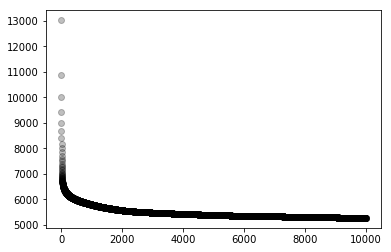

In [13]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [14]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

In [15]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
outcomes_Variable_resized = outcomes_Variable.resize(11959)


# Make the FloatTensor into a numpy.array
outcomes_array = outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
outcomes_list = outcomes_array.tolist()

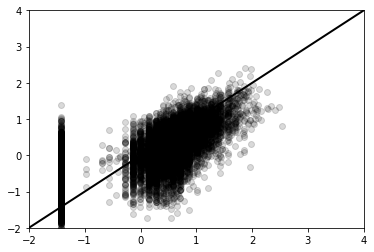

In [16]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 1.1: Validation Set Performance

In [17]:
# Import data
valid_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_cv_set.csv")


# Validation set outcomes
valid_outcomes = valid_df.iloc[:, [0]]


# Make the validation outcomes into a numpy array
valid_outcomes_array = valid_outcomes.values


# Makes the numpy array into a torch Tensor
valid_outcomes_Tensor = torch.from_numpy(valid_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
valid_outcomes_Tensor = valid_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_outcomes_Variable = Variable(valid_outcomes_Tensor)


# Quick check
valid_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3987 entries, 0 to 3986
Data columns (total 1 columns):
DAMAGE_PROPERTY    3987 non-null float64
dtypes: float64(1)
memory usage: 31.2 KB


In [18]:
# Validation set predictors
valid_predictors = valid_df.iloc[:, 1:]


# Make the validation predictors into a numpy array
valid_predictors_array = valid_predictors.values


# Makes the numpy array into a torch Tensor
valid_predictors_Tensor = torch.from_numpy(valid_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
valid_predictors_Tensor = valid_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_predictors_Variable = Variable(valid_predictors_Tensor)


# Quick check
valid_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3987 entries, 0 to 3986
Data columns (total 34 columns):
DURATION_SECONDS      3987 non-null float64
BEGIN_LAT             3987 non-null float64
BEGIN_LON             3987 non-null float64
TOR_LENGTH            3987 non-null float64
TOR_WIDTH             3987 non-null float64
YEAR                  3987 non-null float64
MULTI_VORT_IND        3987 non-null int64
OPEN_WATER_PROP       3987 non-null float64
DEV_OPEN_PROP         3987 non-null float64
DEV_LOW_PROP          3987 non-null float64
DEV_MED_PROP          3987 non-null float64
DEV_HIGH_PROP         3987 non-null float64
BARREN_LAND_PROP      3987 non-null float64
DECID_FOREST_PROP     3987 non-null float64
EVERGR_FOREST_PROP    3987 non-null float64
MIXED_FOREST_PROP     3987 non-null float64
SHRUB_SCRUB_PROP      3987 non-null float64
GRASS_LAND_PROP       3987 non-null float64
PASTURE_HAY_PROP      3987 non-null float64
CULT_CROPS_PROP       3987 non-null float64
WOOD_WETLAND_PR

In [19]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 2178.7625
[torch.FloatTensor of size 1]

In [20]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

In [21]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
valid_outcomes_Variable_resized = valid_outcomes_Variable.resize(3987)


# Make the FloatTensor into a numpy.array
valid_outcomes_array = valid_outcomes_Variable_resized.data.numpy()


# Convert back to log scale
valid_outcomes_array = valid_outcomes_array*5.407597 + 7.688844


# Make the numpy.array into a list
valid_outcomes_list = valid_outcomes_array.tolist()

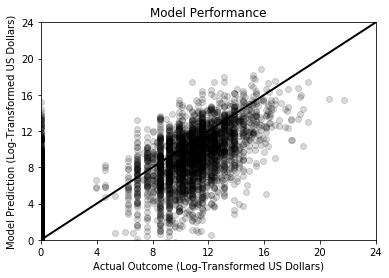

In [22]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [23]:
model[(0)].weight

Parameter containing:

Columns 0 to 5 
-1.1840e-02 -1.6964e-01 -4.8982e-01  1.9910e-01 -3.6053e-01  8.2938e-02
 1.9594e-02 -2.3921e-02 -1.6897e-01 -5.4176e-02 -7.1658e-01  2.2675e-01
-2.6383e-01  5.5796e-02 -4.8715e-01  5.1467e-01 -2.6445e-01  4.9996e-01
 2.2469e-01  4.9214e-04  8.0809e-02 -2.5014e-02  1.4827e-01 -2.0886e-01
-2.2382e-01 -5.9969e-01 -1.7103e-01 -1.7916e-01 -4.0904e-01 -1.6028e-01
 1.4482e-02  2.1579e-01  4.2890e-01  1.1373e-01  3.3554e-01 -2.0108e-01
 1.6478e-01 -4.0692e-01 -2.1737e-01  1.2284e-02 -2.7140e-02 -8.4817e-02
-1.0795e-01  3.1710e-01  2.6929e-01  2.6630e-01 -9.2557e-02  9.6463e-02
 1.4431e-01 -2.5184e-01 -1.4413e-01 -4.1432e-01  1.1278e-01  2.7974e-01
 1.7713e-01 -2.7028e-02  6.1246e-02 -1.9226e-01  1.6803e-01  1.0662e-01
 8.8331e-02  8.8537e-01  4.2783e-01 -5.3952e-02  3.6319e-01 -4.3447e-01
 3.4895e-01  3.7867e-02 -1.3092e-01 -2.4246e-01  1.5203e-02  2.0876e-01
 9.2552e-02 -1.4599e-01 -1.5472e-01 -3.9442e-01 -1.3755e-01  2.8747e-02
 1.3669e-01  3.5276e-01 -

In [24]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.6686 -0.6393  0.2521 -0.6670  0.2962  0.4435  0.3462 -0.5743 -0.3515 -0.5227

Columns 10 to 19 
 0.4076  0.6468 -0.5125  0.4195  0.4256 -0.3817 -0.5142  0.2805  0.6333 -0.6530

Columns 20 to 22 
 0.4813  0.2528  0.4368
[torch.FloatTensor of size 1x23]

## Round 2: Two-Hidden-Layer Neural Network

In [25]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [26]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 1))

In [27]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

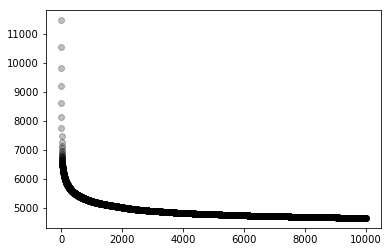

In [28]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [29]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

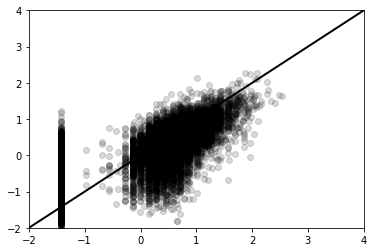

In [30]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 2.1: Validation Set Performance

In [31]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 2250.4863
[torch.FloatTensor of size 1]

In [32]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

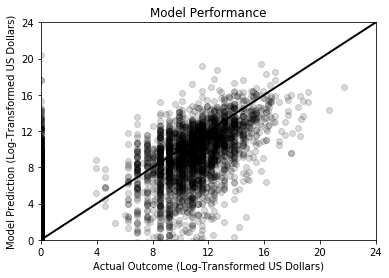

In [33]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [34]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.0503 -0.1505 -0.3544 -0.1057 -0.0774  0.0788 -0.8824 -0.0569  0.0845 -0.0046
 0.1835 -0.2557  0.1343 -0.4693  0.1633 -0.0891 -1.6365 -0.0164  0.1927  0.0396
-0.2648  0.1381 -0.0544  0.4732 -0.3158  0.1532 -1.3578 -0.0142 -0.2895  0.0047
 0.1360 -0.1206 -0.1639  0.0367 -0.0558  0.1634  0.6941  0.0269 -0.0490 -0.1332
 0.0713 -0.2572  0.1061 -0.0167 -0.1720 -0.3019 -0.5116 -0.2308 -0.0847 -0.0843
-0.0144 -0.1600 -0.0395 -0.3774  0.2717 -0.2056 -0.2151 -0.0390 -0.0372 -0.3530
-0.0068 -0.2565 -0.1096  0.2928  0.0488 -0.4291  0.5735  0.2344 -0.1300  0.0018
 0.0055  0.1969  0.2758  0.1327  0.2076 -0.4218 -0.0691  0.1460  0.0828 -0.0705
 0.1421  0.0921  0.2899 -0.2089  0.4291  0.0340 -0.7535 -0.0108  0.2479 -0.2994
 0.0965  0.0239 -0.1698 -0.1591  0.0779  0.4953 -0.2393 -0.0047  0.0195  0.0932
 0.1975  0.1905  0.3179 -0.0322 -0.0970 -0.3371  0.9710 -0.0408 -0.1122 -0.1606
 0.1456 -0.3571 -0.4611 -0.0744  0.1278 -0.1462  0.4907  0.0181  0.1351  0.0816
 

In [35]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.1304  0.1410 -0.4719  0.0717  0.2375 -0.2251 -0.0506 -0.0002  0.0452  0.0454
-0.7232  0.1357 -0.3212 -0.1720  0.3000 -0.0035  0.0675  0.3458 -0.3370 -1.1003
 0.0401 -0.4714  0.1827 -0.0625 -0.5052  0.1637 -0.5552 -0.4965  0.6593  0.0176
 0.7211 -0.4769  0.1988 -0.3227 -0.7278  0.1172 -0.3264 -0.4886  0.2472 -0.2251
 0.2354  0.2307  0.1844 -0.5422 -0.3688 -0.4275 -0.1827 -0.2385 -0.1542  0.5234
 0.1588  0.3783  0.1782 -0.2638 -0.1467 -0.5354  0.0573  0.2442 -0.1344  0.2192
-0.1795 -0.2245 -0.2011 -0.8599 -0.1474  0.2942  0.0538  0.5481  0.1486  0.8090
-0.2735  0.0333  0.1250  0.0136 -0.3809  0.0208  0.2978 -0.8501  0.0311  0.2312
 0.3233  0.6234 -0.7020 -0.0786  0.1966 -0.1785 -0.5322  0.4166 -0.3136  0.1859
 0.1372 -0.1535 -0.0327 -0.3800  0.2108 -0.5480  0.4044  0.0042 -0.1996 -0.0816
 0.2053  0.0322 -0.1007  0.1218 -0.1045 -0.1855 -0.5886  0.2357  0.2306  0.0616
-0.0896  0.2930 -0.2433  0.0591  0.1936 -0.1174  0.3321  0.1130 -0.2295  0.2720
 

In [36]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.3018 -0.7875 -0.9859 -0.5213  0.8999  0.9610  0.2848 -0.4059 -1.2621  0.3139

Columns 10 to 14 
-0.5586  0.4419  0.2851  0.5623 -0.4797
[torch.FloatTensor of size 1x15]

## Round 3: Three-Hidden-Layer Neural Network

In [37]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [38]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 1))

In [39]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

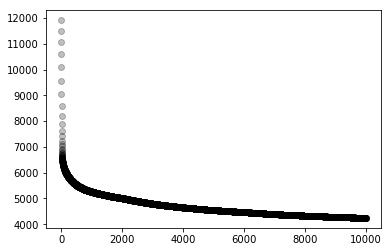

In [40]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [41]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

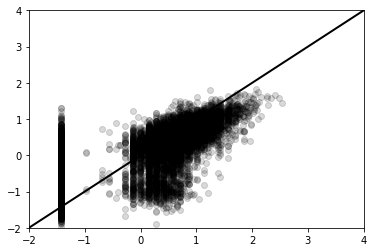

In [42]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 3.1: Validation Set Performance

In [43]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 2451.5139
[torch.FloatTensor of size 1]

In [44]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

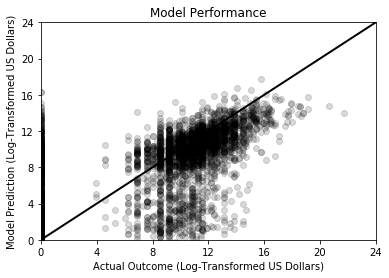

In [45]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [46]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.3763  0.1977 -0.2301  0.2466  0.1731  0.0361  0.5481 -0.0575 -0.0548  0.3510
 0.0005  0.0134  0.1167  0.0441 -0.2648 -0.0964  0.6339  0.1093  0.1715  0.2767
 0.1542  0.3549 -0.0603 -0.2896 -0.0509 -0.1895 -1.1546 -0.0407  0.0569 -0.3723
-0.0369  0.3500  0.0703 -0.0248  0.0613  0.2645  0.5958  0.1832  0.1228 -0.1111
-0.2783  0.0184  0.0449  0.0485 -0.0609 -0.1991  0.1252 -0.1575 -0.0159  0.0822
 0.0515  0.3003  0.0331  0.1088  0.0557 -0.4427 -0.1184  0.2104 -0.2135 -0.0255
-0.0468  0.0485  0.3039 -0.0952  0.0938 -0.1889 -1.2484 -0.0630 -0.0091  0.2046
-0.0324 -0.3253 -0.0443 -0.3288 -0.2280 -0.1781  0.7649  0.0603  0.3133 -0.1159
-0.0932  0.0898  0.1655  0.0424 -0.2920  0.1819 -0.9498 -0.1812 -0.1305 -0.0850
-0.1124  0.0647  0.0564 -0.2132  0.0447  0.0869  0.9493 -0.0616 -0.0742 -0.0205
-0.1536 -0.2562  0.2929  0.1882 -0.0198 -0.1601  0.4861 -0.0722 -0.0677 -0.1596
-0.0857  0.0773 -0.2902 -0.0292  0.0047  0.1623  0.6293 -0.1156 -0.1612 -0.2053
 

In [47]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.0574  0.3410  0.3990  0.0859 -0.3844 -1.0159  0.1078 -0.1060  0.2787 -0.2364
 0.1168 -0.0375  0.0548 -0.3072 -0.0662  0.0220 -0.2176 -0.1850 -0.5906  0.3801
 0.0497  0.0159  0.0890  0.0728 -0.2783 -0.2740  0.2929  0.1793  0.2860  0.0999
 0.2921 -0.0441 -0.0481 -0.2002  0.2550 -0.0890  0.1464 -0.0569 -0.3706  0.2477
 0.2973  0.4695 -0.1833  0.3521 -0.3721  0.0306 -0.1594  0.1594  0.3446 -0.1609
 0.3829  0.1794 -0.1112  0.0074  0.0668 -0.1350  0.2948  0.4985  0.3967 -0.2915
 0.1172 -0.2608 -0.1375  0.1986  0.2741  0.1378 -0.3282  0.0065  0.0662  0.0903
 0.0789 -0.1112 -0.2204 -0.0149  0.2534  0.3017  0.1922 -0.0772 -0.3428  0.2325
-0.0855  0.5274 -0.0900  0.2152 -0.0863 -0.2631  0.2654  0.2448  0.4146 -0.3065
 0.0776 -0.2442  0.1146  0.1213 -0.1554 -0.0583 -0.3109 -0.0689  0.3411  0.2277
 0.3893 -0.3529 -0.2891 -0.1129  0.2121 -0.1171  0.0176  0.0865 -0.0948  0.3054
 0.1869 -0.4776  0.1157 -0.3900  0.3549 -0.0465 -0.5308 -0.3560 -0.3041  0.0123
 

In [48]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.5466 -0.1724  0.2651  0.3453 -0.2195  0.4096  0.1679  0.2311 -0.0779  0.3560
 0.4378 -0.4015  0.1699 -0.1111 -0.4514 -0.0762  0.2965 -0.0464  0.2356  0.2473
 0.8685 -0.5746  0.1401  0.1839  0.0874  0.6296 -0.3255 -0.5617  0.6442  0.3352
-1.0749  0.4864 -0.2888  0.3152  0.1379 -0.4664  0.1649  0.3434 -0.2353  0.0083
-0.7728  0.3265 -0.0888  0.0480  0.0334 -0.4831  0.1597  0.3975 -0.4366 -0.2133
-0.1145  0.4331 -0.0561  0.2996  0.5918 -0.2750 -0.9409 -0.8111 -0.8181 -0.0532
 0.3859 -0.3902  0.2464 -0.8907  0.1105  0.1211  0.2374 -0.2720  0.3333  0.0754
-1.2059  0.7103 -0.7646  0.0505 -0.2993 -0.6212  0.0844  0.2817 -0.5097  0.0826
-0.3574  0.5468  0.0630  0.2797 -0.0307 -0.7854  0.3120  0.5022 -0.4614  0.0878
 0.8925 -0.5831  0.3683 -0.2464  0.3105  0.3189 -0.1442 -1.1619  0.5949  0.2156

Columns 10 to 14 
-0.2704 -0.2495 -1.2114  0.0442 -1.1030
-0.3633 -0.1237 -0.2004  0.2230 -0.2453
-0.3196 -1.1320 -1.1804 -0.4092 -0.9673
 0.3180  0.4227  0.703

In [49]:
model[(6)].weight

Parameter containing:
-0.3870 -0.3021  1.5911  0.5957  0.9575 -1.5633 -0.6931 -1.3406  0.4886 -0.9864
[torch.FloatTensor of size 1x10]

## Round 4: Four-Hidden-Layer Neural Network

In [50]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [51]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 1))

In [52]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

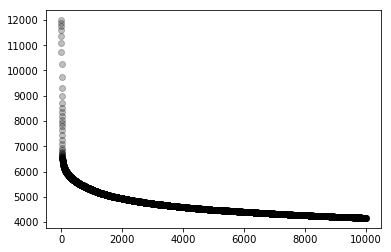

In [53]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [54]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

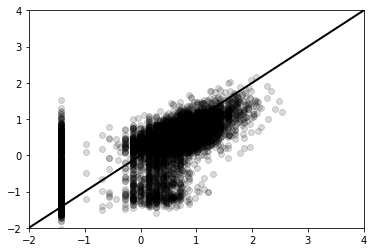

In [55]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 4.1: Validation Set Performance

In [56]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 2468.7673
[torch.FloatTensor of size 1]

In [57]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

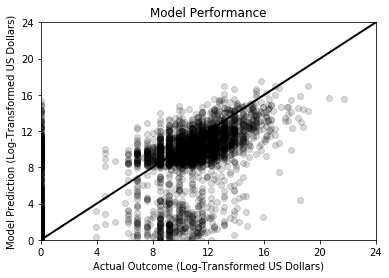

In [58]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [59]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.2391 -0.0945 -0.0673  0.1458  0.0009 -0.0224 -0.2764  0.1255 -0.0141 -0.0567
 0.2603  0.1828  0.0453 -0.0436  0.1023  0.0924 -0.0683  0.1882 -0.0185 -0.2073
-0.0195  0.5509 -0.0235 -0.5240 -0.0481  0.0644 -0.0321  0.0501 -0.1537 -0.1525
-0.1007 -0.0965  0.1787 -0.0867  0.0215 -0.0171  0.0696  0.1170  0.2542  0.0911
 0.0217  0.2077 -0.0328 -0.0874  0.0577  0.1059  0.2180  0.0509 -0.2510  0.1960
 0.0224  0.2336  0.1336  0.1089 -0.1531 -0.1507  0.3745  0.0200 -0.0309 -0.1120
-0.1668 -0.0252 -0.0366  0.1081 -0.1057 -0.1329 -0.1303  0.2233  0.3905 -0.2771
-0.0399  0.1373 -0.1656 -0.1425  0.0487  0.3268  0.2250 -0.0333 -0.2636  0.3249
-0.0907  0.2368 -0.1476  0.0077  0.2646  0.0703  0.2603  0.0285 -0.0596 -0.2000
 0.4441 -0.3387  0.2236  0.0574  0.1577 -0.0854  0.2675 -0.0292  0.1266 -0.0788
 0.4182  0.2561 -0.0383  0.3934  0.0874 -0.0297  0.5167  0.0636 -0.0747  0.0339
 0.2406 -0.0824 -0.1314 -0.3130  0.0867  0.0032 -0.1970  0.1788 -0.1990  0.0021
-

In [60]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.1860  0.0426 -0.1924 -0.2949 -0.1044 -0.2351  0.0017 -0.2112  0.0178 -0.0145
-0.0681  0.2815  0.1804 -0.3243 -0.1181 -0.2398  0.1223  0.2171  0.2453  0.1763
 0.2188 -0.4105 -0.4232  0.1399  0.0015 -0.3304  0.0453  0.2005 -0.2921  0.3231
-0.0431 -0.1550  0.0376  0.0344  0.2077  0.0677  0.2769 -0.0979  0.0974  0.0563
 0.0643  0.3330  0.0899 -0.1759 -0.0877 -0.1272 -0.2107 -0.1645  0.1384  0.1963
-0.0717  0.1915  0.1205  0.2025 -0.1411 -0.2303 -0.4055 -0.3933  0.1657 -0.4723
-1.3192 -0.5682 -0.9751 -0.1553 -0.2286  0.8420  0.1321 -0.4834  0.3097 -0.7053
 0.3048 -0.4393  0.2052  0.3739  0.3565  0.0910  0.2808  0.0393  0.1517  0.0328
-0.0462  0.1848  0.1245 -0.3231  0.0400 -0.2903  0.2792 -0.1439  0.2327 -0.3370
-0.0570  0.0976 -0.0233  0.2258  0.1467 -0.3248  0.2887 -0.3389  0.1001  0.0425
-0.1823  0.0129  0.0518 -0.1198 -0.3061 -0.2082  0.1916 -0.2625  0.0922  0.0964
-0.1096 -0.4594 -0.0801  0.0354  0.5789  0.5081  0.4911  0.2839 -0.1628  0.1841
 

In [61]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.5702  0.2067 -0.3710 -0.3479  0.0062  0.1712 -1.2339 -0.2670  0.2992  0.0868
-0.2395  0.0400 -0.0806  0.0855 -0.1777  0.2768  1.3285  0.1540  0.2155 -0.1929
 0.3827 -0.2529 -0.3783  0.0363  0.0914  0.2088 -0.7728 -0.5856  0.3114 -0.0960
-0.0347 -0.0745  0.4040  0.0505 -0.1526  0.1394 -1.1308  0.0950 -0.0620 -0.0062
-0.1091 -0.0511  0.4606  0.2893 -0.4457 -0.4148  2.0407  0.4100 -0.3063 -0.2780
-0.2138 -0.2557  0.5926  0.4130 -0.5660 -0.4894  0.9525  0.3988 -0.3121 -0.2736
-0.2211  0.0386 -0.1898 -0.1296  0.2184  0.2317 -1.0897 -0.5006  0.2222  0.2100
-0.3289  0.1751  0.0403 -0.2448  0.0055  0.1689 -0.1119  0.0809  0.0026 -0.2020
-0.3074 -0.3073  0.4928  0.3938 -0.4314 -0.2678  0.5557  0.3193 -0.3147 -0.0640
 0.4588  0.1824 -0.6087 -0.2500  0.2184  0.0519 -1.2660 -0.3310  0.2576  0.3145

Columns 10 to 14 
 0.0237  0.0122 -0.1212  0.2204 -0.2361
-0.1056  0.1475  0.1774  0.3658 -0.1632
-0.0713  0.0891  0.7097 -0.1161 -0.0860
 0.2470  0.3739  0.225

In [62]:
model[(6)].weight

Parameter containing:
-0.0332  0.0314 -0.1940 -0.1547  0.3647  0.3920  0.0284 -0.2387  0.3488  0.0970
 0.3299 -0.2730  0.1869  0.2998 -1.0116 -1.1395  0.2693 -0.1226 -0.9505 -0.0060
 0.2724 -0.3691  0.2492  0.0127 -1.3774 -1.1457  0.1120  0.2802 -0.9859  0.0993
-0.5268 -0.1370  0.8014 -0.4514  0.0581  0.2048  0.9598 -0.5525 -0.2692 -0.2885
 0.2569 -0.1802  0.3922  0.2808 -1.3127 -1.4197  0.1241  0.2034 -0.9308  0.2224
 0.0238 -0.5464  0.3458 -0.0345  0.2251  0.2864  0.1225 -0.5471  0.1332  0.1804
-0.0553  0.3453 -0.4189  0.2321  0.0669 -0.0439 -0.0241 -0.2951  0.1406  0.3822
[torch.FloatTensor of size 7x10]

In [63]:
model[(8)].weight

Parameter containing:
 0.1234 -0.5602 -0.8885  1.2770 -0.9371  0.6829  0.7659
[torch.FloatTensor of size 1x7]

## Round 5: Five-Hidden-Layer Neural Network

In [64]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [65]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 1))

In [66]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

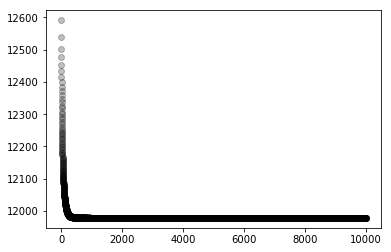

In [67]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [68]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

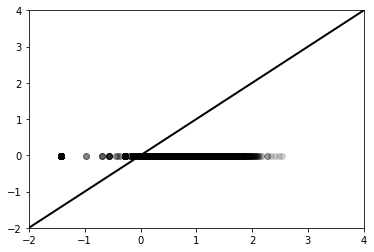

In [69]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 5.1 Validation Set Performance

In [70]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 3936.8081
[torch.FloatTensor of size 1]

In [71]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

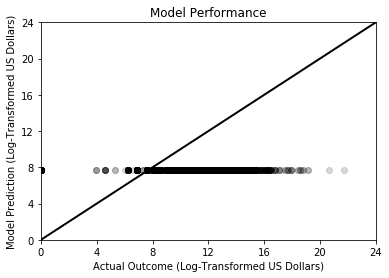

In [72]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [73]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0340 -0.1001  0.1048  0.0326  0.0184  0.1659 -0.0387  0.0096 -0.0011  0.1450
-0.0686  0.0264  0.1419  0.1429 -0.0259  0.0868  0.0962 -0.0630 -0.0526  0.0328
-0.0070 -0.0083  0.0913 -0.1296 -0.0755 -0.1573 -0.0872 -0.0141 -0.0255 -0.0872
 0.0600 -0.1578 -0.0760  0.1288 -0.0864 -0.0636  0.1679 -0.1437 -0.0490 -0.1096
 0.1530 -0.1365  0.0414 -0.1707 -0.0656 -0.0734 -0.0377 -0.1407 -0.1072 -0.1400
 0.0594 -0.1163 -0.0249  0.0806  0.0577  0.0910  0.0905  0.0755  0.1157 -0.0210
-0.0850  0.1455  0.0869 -0.0465 -0.1246 -0.0867 -0.1045 -0.0474 -0.0957 -0.0016
-0.0061 -0.1654 -0.1618  0.0388 -0.0677 -0.0483  0.1566 -0.1058  0.0719  0.1214
 0.0329 -0.1448  0.1683  0.1150  0.0959  0.1215  0.0932 -0.1263  0.0076 -0.1596
 0.1627 -0.1462  0.0947 -0.0350 -0.0363  0.1225  0.1299 -0.0421  0.1078  0.1169
-0.1016 -0.0688  0.0846 -0.1689  0.1205  0.0270 -0.1250  0.0683 -0.1115  0.1289
 0.1303 -0.0743  0.0156 -0.0755  0.0192  0.1279 -0.0462 -0.0083 -0.1667  0.0155
 

In [74]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.0043  0.0306  0.1224 -0.1896  0.1598 -0.1811  0.1383  0.0870 -0.1013  0.0925
 0.1412 -0.0660  0.2019  0.0295 -0.1324  0.0134 -0.1270  0.0480 -0.1993  0.1494
 0.0226  0.1870  0.2079 -0.2016  0.0436  0.0701  0.1817  0.1187  0.1372 -0.0485
-0.1869  0.1942 -0.1085 -0.0730  0.0367  0.0068 -0.0237  0.0728 -0.1576  0.1944
 0.1699  0.1889 -0.1455 -0.1098  0.0554 -0.1805  0.1138  0.0112  0.1702  0.0372
 0.1834  0.1524 -0.0041  0.0085  0.1834 -0.1249  0.0343  0.0563  0.1969 -0.2018
 0.0032  0.1725  0.1662 -0.0591 -0.0365 -0.1117 -0.1064 -0.2033  0.1647  0.1577
 0.0469 -0.0622  0.2061  0.1153 -0.0463 -0.1886  0.0918  0.1398 -0.0722 -0.0047
 0.0613  0.0175 -0.1934  0.2009  0.1216  0.1156 -0.0919 -0.0380  0.2036  0.0782
 0.1116  0.1293 -0.0355 -0.0786  0.1744  0.0504 -0.0387 -0.1667 -0.0863 -0.1978
 0.0071 -0.0759 -0.1647 -0.1925  0.2002 -0.1341 -0.0243 -0.0078  0.0411 -0.0978
-0.0564  0.0707  0.1503  0.0763  0.0142  0.1435 -0.1511 -0.1503 -0.1324 -0.1418
 

In [75]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.0832 -0.2464  0.0539 -0.2370 -0.1359 -0.0304 -0.1790 -0.0942 -0.0436  0.1972
 0.1527  0.0604  0.1204  0.2233  0.2241  0.2243  0.0051  0.0637 -0.0820 -0.1387
-0.0980  0.1500  0.1586 -0.0247 -0.0500 -0.0953  0.1429  0.2380  0.0067  0.2541
-0.2148  0.0811 -0.1655  0.1144  0.2480  0.1536 -0.1031 -0.1779 -0.2091 -0.0262
 0.0941 -0.1489  0.0901  0.2342 -0.0032  0.2430  0.2389  0.1610 -0.0410  0.1499
-0.0264 -0.1217  0.2496 -0.1585  0.1177 -0.0625  0.0245  0.0497  0.0885 -0.0850
-0.1315  0.2272  0.0079  0.0863  0.0176  0.2511  0.1301  0.1593 -0.0332 -0.2264
 0.2565 -0.1561 -0.0803 -0.1015 -0.0983  0.0145 -0.2288 -0.2421  0.0835 -0.1252
 0.0564  0.0373  0.0374  0.0604 -0.2063  0.1168 -0.0966 -0.2552 -0.1312  0.0223
-0.2418  0.1609 -0.0604 -0.2327  0.1764 -0.0785 -0.0037 -0.1363 -0.0124  0.0436

Columns 10 to 14 
 0.1272 -0.0246 -0.0700  0.0187  0.1754
-0.0998 -0.0567  0.2448 -0.1797  0.1513
-0.1304 -0.0640  0.1826  0.0891 -0.0532
 0.2022 -0.1383 -0.025

In [76]:
model[(6)].weight

Parameter containing:
-0.2762 -0.0074  0.1474 -0.0347  0.1393  0.0544  0.1420 -0.2236  0.1362  0.1924
 0.2188 -0.2519  0.0234 -0.1767 -0.1645 -0.0152 -0.2730  0.2043 -0.0568 -0.1256
 0.0716  0.0235 -0.2965  0.1280 -0.1325 -0.0767  0.2220 -0.0740 -0.0311  0.2057
-0.2022 -0.0649 -0.0494 -0.1471  0.3029  0.0973  0.2952 -0.2649 -0.2040 -0.3050
-0.3048 -0.2406 -0.1124 -0.0937  0.1979  0.0040  0.2299 -0.0260  0.1524 -0.0339
 0.0268 -0.0960  0.0519 -0.2060  0.1727  0.0750 -0.2665 -0.1816  0.2873  0.0046
 0.1623 -0.2529 -0.0412 -0.1854 -0.0479  0.0916 -0.0932 -0.0407 -0.2017 -0.1262
[torch.FloatTensor of size 7x10]

In [77]:
model[(8)].weight

Parameter containing:
 0.2913  0.1039 -0.0625 -0.0283  0.2328 -0.2743 -0.2507
-0.1632  0.0147  0.2754 -0.1966  0.3098 -0.1610 -0.3003
 0.2775 -0.0436  0.1665 -0.1528 -0.0632 -0.3552  0.2077
 0.0351 -0.1594  0.1684  0.2548  0.1747  0.3133 -0.0785
 0.1542 -0.1584  0.2785  0.0739 -0.3497 -0.1557 -0.3178
[torch.FloatTensor of size 5x7]

In [78]:
model[(10)].weight

Parameter containing:
-0.2167  0.0302  0.2899  0.3775  0.2443
[torch.FloatTensor of size 1x5]

## Round 6: Six-Hidden-Layer Neural Network

In [79]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [80]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 1))

In [81]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

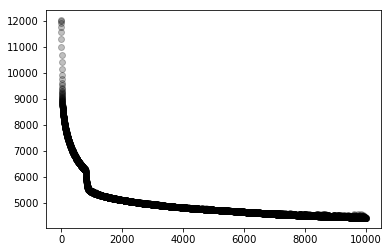

In [82]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [83]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

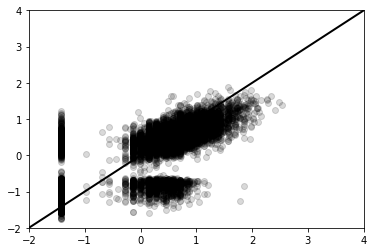

In [84]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 6.1: Validation Set Performance

In [85]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 2572.0342
[torch.FloatTensor of size 1]

In [86]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

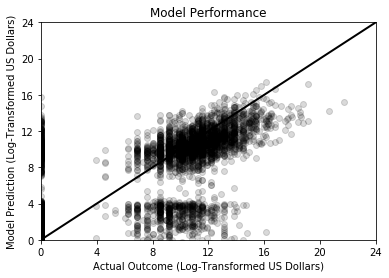

In [87]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [88]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.0858  0.1918 -0.0254  0.1026  0.0658  0.2820 -0.5499  0.0255 -0.1334 -0.0489
 0.0845 -0.2379  0.0713 -0.0442 -0.0865  0.0210  0.1849  0.0899  0.0634  0.0754
-0.1332 -0.0545 -0.3076  0.2698 -0.3550 -0.0922  0.1051 -0.0457 -0.2691 -0.0245
-0.0975  0.1280  0.1184  0.0737 -0.0153  0.0407 -0.0212  0.1425 -0.0726 -0.2094
-0.0884  0.1170 -0.2259 -0.0102  0.0782  0.2136 -0.1446  0.1096  0.1987  0.0494
 0.1557 -0.1291  0.1250  0.0283  0.0761  0.1117  0.8060  0.0580 -0.1048  0.0077
-0.2536 -0.0721 -0.2481 -0.0260  0.0729  0.1450 -0.0648 -0.1091 -0.1961 -0.1432
-0.2054  0.0728 -0.3708  0.1082  0.0494 -0.0036  0.4313  0.0535 -0.1414 -0.0084
-0.1264  0.1995 -0.2889  0.2396 -0.0743 -0.4733  0.2779  0.0313 -0.0820 -0.1060
 0.0396 -0.0258  0.1514  0.0610  0.0295 -0.0162  0.0865  0.0892  0.1566  0.0253
-0.0280  0.0799  0.3375  0.1954  0.0438 -0.1972  0.0914 -0.3442 -0.1343 -0.1043
 0.3370  0.3532 -0.0720  0.0198  0.2165  0.1881 -0.2576 -0.0774  0.1645 -0.1248
 

In [89]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.1616 -0.2080 -0.0845 -0.0025 -0.0408  0.1633 -0.1722 -0.2159  0.1348  0.0357
-0.0798  0.2957 -0.2481  0.0336 -0.0732  0.1740 -0.1806 -0.0224  0.2752 -0.0913
 0.1630 -0.4201  0.1691  0.0489  0.0447 -0.0215  0.0804  0.3396  0.2319  0.2365
 0.1849  0.0637  0.0830  0.0462  0.1323  0.0144  0.3257  0.2812 -0.1306 -0.0535
 0.3237  0.0352  0.3742  0.0959 -0.0068 -0.2928  0.3409  0.2035 -0.0001  0.1745
-0.2742  0.0439 -0.0897  0.2777  0.0196  0.2597  0.0290  0.1811  0.0824 -0.0192
 0.0624 -0.0600  0.3044 -0.1607  0.3522  0.0536  0.0226  0.3359 -0.2580  0.1836
 0.0576  0.1123  0.1308  0.1372  0.0650 -0.0121  0.3180  0.3967  0.0876  0.0414
-0.1351 -0.0702 -0.4258  0.2773 -0.1123  0.2187 -0.1937 -0.0868  0.1554 -0.0674
-0.4956  0.1451 -0.0861  0.2790 -0.3097 -0.1265  0.1013 -0.4416  0.2898 -0.2557
-0.3374 -0.3478  0.2564  0.2263 -0.0864  0.0397  0.2111  0.0947 -0.2190 -0.4142
-0.1065  0.2272 -0.3636  0.0794 -0.1122  0.0886 -0.3491 -0.1140  0.0383 -0.1348
-

In [90]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.1909 -0.1432 -0.2674  0.3288 -0.1651  0.0569 -0.0543 -0.3033  0.3634  0.0883
-0.0457 -0.4127  0.4387  0.3680  0.3402 -0.1364  0.3922  0.4405 -0.2875 -0.3837
 0.2044  0.2779 -0.5882  0.1561 -0.2172  0.0551 -0.2790 -0.2714  0.3073  0.0761
 0.0090 -0.2022  0.4601  0.4149  0.4673 -0.0269  0.3040  0.2257 -0.1641 -0.4631
-0.3171  0.3091 -0.3243  0.3003 -0.2953  0.2350 -0.2302  0.1326 -0.2983  0.0742
 0.2820  0.2816 -0.5209 -0.1497 -0.4672  0.3458  0.0916 -0.0182 -0.0716  0.3031
 0.2272 -0.0161 -0.4725  0.0944 -0.3960  0.3050 -0.2393 -0.4666  0.2192  0.1540
-0.2579  0.0323 -0.3796  0.1512 -0.4376 -0.1690 -0.4952 -0.2543  0.4136  0.2174
 0.1366  0.0153 -0.6594 -0.2565 -0.5395 -0.0099 -0.0016  0.0542  0.0944  0.3871
-0.1470 -0.2818  0.6378  0.2018  0.5501  0.0914  0.3596  0.1662 -0.2234 -0.2473

Columns 10 to 14 
 0.5198 -0.0652  0.3362 -0.0198  0.1931
-0.6768 -0.4164  0.0380 -0.3334 -0.1136
 0.5131  0.1720  0.2905  0.2259  0.0826
-0.4169 -0.2409  0.167

In [91]:
model[(6)].weight

Parameter containing:
 0.2487 -0.1656 -0.2895 -0.2998  0.0170 -0.0984  0.1254 -0.2212 -0.3185 -0.1478
 0.1417  0.0620 -0.7349 -1.3096  0.4292  0.4015 -0.7007 -1.1387 -0.0955 -0.8395
 0.0716 -0.8978  0.1620 -0.7858  0.5961 -0.0599  0.4166 -0.6161  0.2234 -0.7954
 0.1960 -1.2263  0.0327 -0.6353  1.4978  0.2064 -0.0278 -0.0509  0.2674 -1.4411
 0.1989 -0.4887 -0.1005 -0.4085  0.9064  0.0744 -0.3360 -0.3569 -0.5152 -0.3635
 0.1341  0.8754 -0.2287  1.0633 -1.3801 -0.1776 -0.3010 -0.6009 -0.4436  0.9840
 0.3373 -0.6835  0.2561 -0.4480  0.4132  0.1066  0.2134 -0.8269  0.2348 -0.7445
[torch.FloatTensor of size 7x10]

In [92]:
model[(8)].weight

Parameter containing:
-0.3028  0.8030  0.1614  0.3005  0.8195 -1.5557  0.3962
-0.1857  0.6057  0.2710 -0.0830  0.8886 -1.5797  0.1618
 0.1868 -0.1051 -0.3237 -1.1224 -0.0962  0.1997  0.1972
-0.2530  1.1351  0.3155  0.1952  0.9847 -1.3146  0.3467
-0.2353  2.1299  0.3163  0.3797  2.2551 -0.0576  0.6594
[torch.FloatTensor of size 5x7]

In [93]:
model[(10)].weight

Parameter containing:
-0.7378 -0.9690  0.5328 -0.2703  0.9302
 0.4523  0.2576 -0.7435  0.5975  0.2010
 0.4999  0.8829 -1.2859  0.7235  0.5504
[torch.FloatTensor of size 3x5]

In [94]:
model[(12)].weight

Parameter containing:
-1.3452 -0.5137  0.9121
[torch.FloatTensor of size 1x3]

## Round 7: Seven-Hidden-Layer Neural Network

In [95]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [96]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 2),
                            torch.nn.ReLU(),
                            torch.nn.Linear(2, 1))

In [97]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

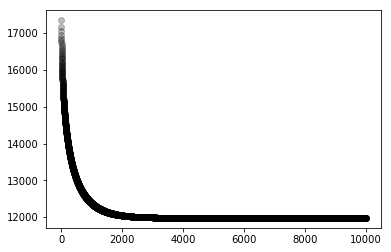

In [98]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [99]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

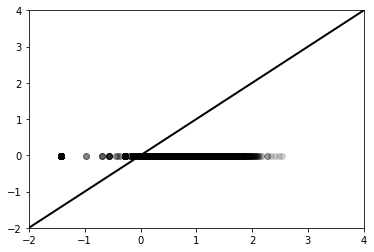

In [100]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 7.1: Validation Set Performance

In [101]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 3936.8083
[torch.FloatTensor of size 1]

In [102]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

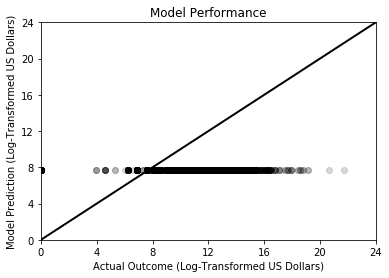

In [103]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [104]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.1179  0.0231 -0.0119  0.0474  0.0877 -0.0158  0.0327 -0.1469  0.0138 -0.0708
 0.1362 -0.1265  0.0763 -0.0074 -0.1425 -0.0295  0.0067 -0.0282 -0.0188  0.1173
-0.0360 -0.0616  0.0333  0.1731  0.0452 -0.1173  0.1519 -0.0507  0.0181 -0.0621
 0.1296  0.1397 -0.1382 -0.1242  0.1571 -0.0860 -0.0014 -0.0652  0.0898  0.0692
 0.0889 -0.0168  0.1170  0.0687 -0.0696 -0.0281 -0.0527  0.0254  0.1125 -0.0363
 0.0225  0.1668  0.0721  0.0565  0.0062 -0.1177 -0.0462  0.1575 -0.1796  0.0873
 0.1426 -0.0030 -0.0962 -0.0957 -0.0778 -0.0419 -0.0184  0.0871  0.0648 -0.0777
 0.1437 -0.1462  0.1268 -0.1417 -0.0020  0.0470  0.0437 -0.1675 -0.0992  0.0586
 0.1900 -0.1121 -0.1554 -0.0169 -0.1418 -0.0839  0.1700  0.1469 -0.1360 -0.1331
-0.0940  0.1327 -0.1487  0.0971  0.1210 -0.1319  0.1388 -0.1034 -0.0989 -0.1331
 0.1143  0.1130 -0.1539 -0.1450 -0.1056  0.1491  0.0582 -0.1024 -0.0338  0.1556
-0.0058 -0.0742  0.0361  0.0569 -0.0901  0.0046 -0.1416  0.1182  0.1588 -0.1629
-

In [105]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.0525 -0.0766 -0.0118  0.0918  0.0491  0.0993  0.0977 -0.0617 -0.1871 -0.0429
 0.1146 -0.0678  0.0385  0.0958 -0.1876  0.0438  0.1397  0.1129  0.1491  0.0907
-0.1147  0.1799  0.0045 -0.1297  0.1112  0.0837 -0.0380  0.1541  0.0293 -0.0032
 0.1484  0.0292  0.0657 -0.0648  0.0549  0.0293 -0.1108 -0.0159  0.0748  0.1838
-0.1623 -0.0653 -0.1896 -0.1934 -0.0815 -0.0195 -0.0214  0.0630  0.1435  0.1322
-0.0066  0.1710 -0.1586  0.0096  0.0621  0.1311 -0.0920  0.1122 -0.0821  0.0945
-0.1132  0.1905 -0.0405 -0.1840 -0.1866  0.0542 -0.0994  0.0036 -0.1733  0.1355
-0.1213  0.0539 -0.0416 -0.0060  0.1430  0.1117  0.1824  0.1056  0.0049  0.0067
 0.0228  0.1007 -0.0581  0.1681  0.1134 -0.0161 -0.0699  0.1045 -0.0496  0.0693
 0.1553  0.0863  0.0504  0.1049 -0.0910 -0.0476 -0.1587 -0.1486  0.1389  0.0778
-0.1449 -0.0635  0.2081 -0.1783 -0.0127 -0.0295  0.0181  0.1305  0.0627 -0.0243
-0.1926 -0.1383 -0.1009 -0.2020  0.1372  0.1665  0.0592  0.0614  0.0424 -0.1836
-

In [106]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.1296 -0.0558  0.1941 -0.1914 -0.2605  0.2422 -0.1408 -0.0760 -0.1286 -0.2341
 0.1992 -0.1508 -0.1558  0.2247 -0.0763 -0.1582 -0.2136 -0.2566  0.2008 -0.0657
-0.0183 -0.1024  0.1356  0.1597 -0.0341 -0.2438 -0.0074  0.0674  0.0319  0.1178
 0.1298 -0.2087  0.1682 -0.0315  0.1679  0.1560  0.1337  0.1622  0.0589 -0.0389
-0.1279 -0.0877 -0.0293  0.0932  0.1717  0.2421  0.1721 -0.0217 -0.1185  0.1062
 0.2509  0.2304  0.2291  0.1270  0.0425  0.0942 -0.0612 -0.0942 -0.0640 -0.1404
-0.0923 -0.1815  0.2267 -0.0849  0.0762 -0.1367  0.2426  0.2104  0.0464  0.1789
-0.0412 -0.2112  0.0424  0.0618  0.1050  0.2156  0.0323 -0.1023  0.1552 -0.0248
-0.0965  0.1495  0.2189  0.0071  0.1083  0.0610 -0.0733  0.0630  0.2074  0.0106
 0.0193  0.1334  0.2578 -0.0099  0.0193  0.0571 -0.0719  0.0193  0.1939 -0.1778

Columns 10 to 14 
-0.0526 -0.1186 -0.0388  0.2096  0.0398
-0.0480  0.0859 -0.0840 -0.0946  0.1249
 0.1210  0.1314 -0.1963  0.0659 -0.2042
-0.0630  0.0912 -0.094

In [107]:
model[(6)].weight

Parameter containing:
 0.2836  0.1807 -0.2320  0.1969 -0.0598 -0.1986 -0.0362 -0.0051 -0.0716 -0.2396
 0.1411  0.1263  0.2274  0.2117 -0.3235  0.0406 -0.2560  0.1343  0.2100  0.1993
-0.0869 -0.0476  0.0646 -0.0613  0.0954 -0.2905 -0.0964 -0.2003 -0.2023  0.2422
-0.0873 -0.1047 -0.1784 -0.0624  0.2382 -0.1218  0.0541 -0.1385  0.0563 -0.2348
 0.3026 -0.1410  0.1824 -0.1727 -0.2862 -0.0952 -0.0369  0.1250 -0.0470 -0.1315
 0.2891  0.2152  0.1301 -0.2687 -0.2522 -0.0737 -0.1362 -0.0483  0.1672 -0.2456
 0.2669 -0.0846 -0.2895  0.1775 -0.0555  0.1338  0.3053  0.2583 -0.2324  0.1832
[torch.FloatTensor of size 7x10]

In [108]:
model[(8)].weight

Parameter containing:
-0.3415  0.0575  0.1502 -0.2599 -0.0060  0.2474  0.0177
-0.1929  0.2842 -0.2438  0.0906  0.2180 -0.3015 -0.1496
 0.0998  0.1235  0.0004 -0.1857 -0.3732 -0.1075  0.1044
 0.3218  0.2073  0.0776  0.3093  0.1234 -0.2888 -0.0163
-0.3420 -0.1059  0.3503 -0.2614  0.1401  0.1417  0.3085
[torch.FloatTensor of size 5x7]

In [109]:
model[(10)].weight

Parameter containing:
-0.2943  0.4021  0.1165  0.2650  0.0329
-0.2900  0.0296 -0.2683 -0.0839 -0.3937
 0.3787 -0.0622 -0.3532 -0.0431  0.1142
[torch.FloatTensor of size 3x5]

In [110]:
model[(12)].weight

Parameter containing:
 0.0657  0.4788 -0.2188
 0.5407 -0.3857  0.4129
[torch.FloatTensor of size 2x3]

In [111]:
model[(14)].weight

Parameter containing:
 0.4322  0.5892
[torch.FloatTensor of size 1x2]

## Round 8: Linear Regression

In [112]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [113]:
# Make the neural network - really a regression
model = torch.nn.Sequential(torch.nn.Linear(34, 1))

In [114]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

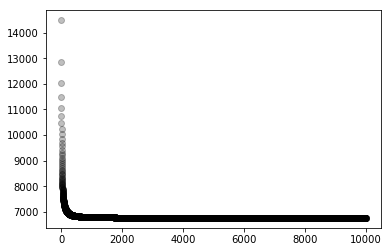

In [115]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [116]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

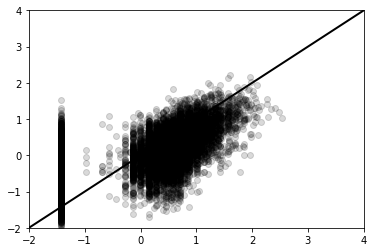

In [117]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 8.1: Validation Set Performance

In [118]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 2372.3438
[torch.FloatTensor of size 1]

In [119]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

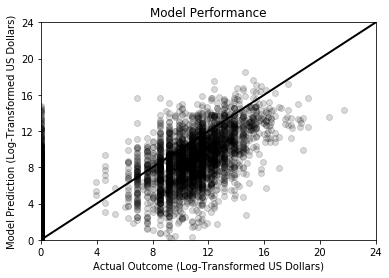

In [120]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [121]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0355 -0.0268  0.0888  0.1498  0.1959 -0.2061  0.0323 -0.0160 -0.0370 -0.0040

Columns 10 to 19 
-0.0510  0.0570  0.0033 -0.0072  0.0649 -0.0190 -0.0153 -0.0457  0.0512  0.0203

Columns 20 to 29 
 0.0076  0.0261 -0.0532  0.0217  0.0533  0.0357  0.1723  0.0622  0.0240  0.1200

Columns 30 to 33 
-0.0311  0.0160  0.0755  0.0239
[torch.FloatTensor of size 1x34]